# Stock Price prediction by simple RNN and LSTM


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [3]:
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\Tesla.csv - Tesla.csv.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)

In [6]:
df.shape 

(1692, 6)

In [37]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

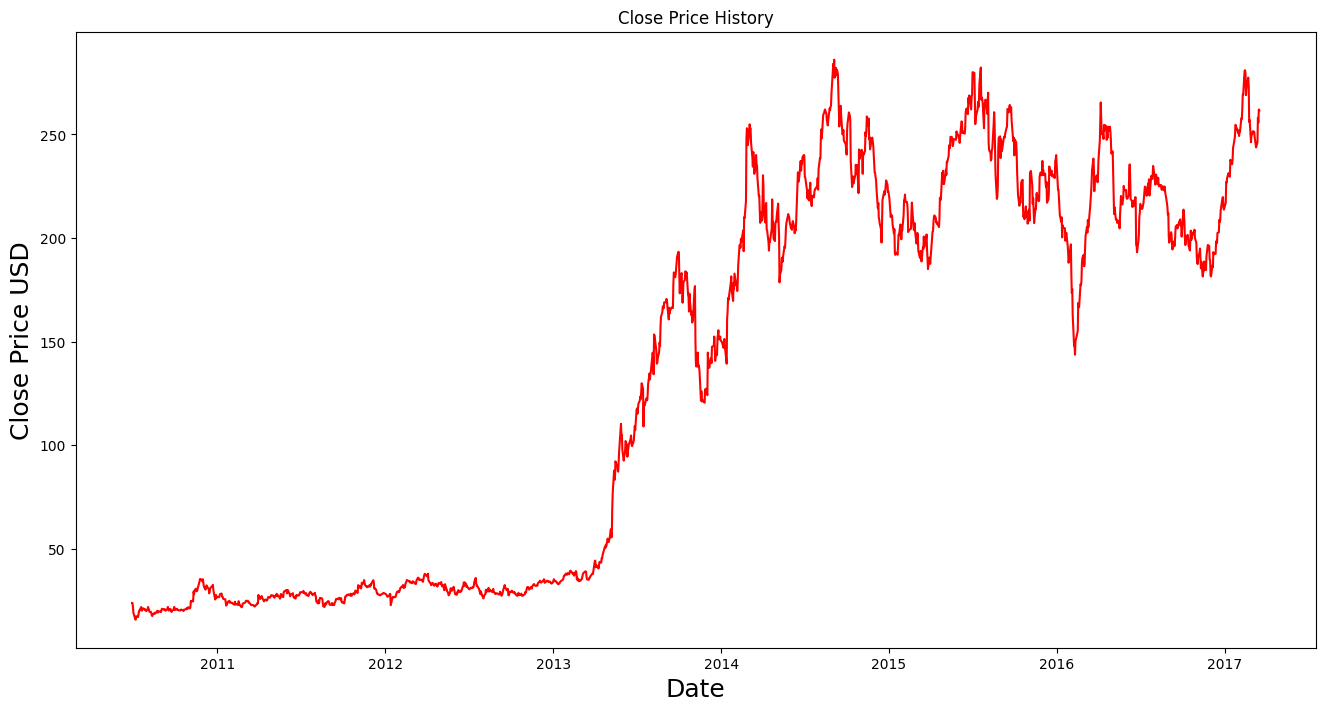

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

In [8]:
data = df.filter(['Close'])
dataset = data.values 
training_data_len = math.ceil(len(dataset)*.8) 
training_data_len

1354

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02993635],
       [0.02971433],
       [0.02279455],
       ...,
       [0.88784039],
       [0.91122698],
       [0.9091918 ]])

In [10]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

[array([0.02993635, 0.02971433, 0.02279455, 0.01258141, 0.00114713,
       0.        , 0.00614268, 0.00592066, 0.00462551, 0.00865897,
       0.01494967, 0.01513469, 0.01791   , 0.02260953, 0.01665186,
       0.01635583, 0.01924215, 0.02031528, 0.01905714, 0.01757696,
       0.01820603, 0.01683689, 0.01531972, 0.01894612, 0.02275755,
       0.02020426, 0.01720693, 0.01402457, 0.01406157, 0.01195234,
       0.00777087, 0.00666075, 0.00932504, 0.01102724, 0.01239639,
       0.01099023, 0.01106424, 0.01221137, 0.01602279, 0.01258141,
       0.0151717 , 0.01461664, 0.01443162, 0.01506069, 0.01361752,
       0.01720693, 0.01946418, 0.01942717, 0.01753997, 0.01887211,
       0.01816903, 0.01617081, 0.01820603, 0.01968621, 0.02286856,
       0.01902013, 0.01639284, 0.01946418, 0.01839106, 0.01506069])]
[0.013913554154743983]



In [12]:
import numpy as np

In [13]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1294, 60, 1)

In [15]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1294/1294 [==============================] - 30s 21ms/step - loss: 0.0037
Epoch 2/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0013
Epoch 3/10
1294/1294 [==============================] - 35s 27ms/step - loss: 0.0011
Epoch 4/10
1294/1294 [==============================] - 35s 27ms/step - loss: 9.8662e-04
Epoch 5/10
1294/1294 [==============================] - 36s 28ms/step - loss: 7.5176e-04
Epoch 6/10
1294/1294 [==============================] - 36s 27ms/step - loss: 6.5480e-04
Epoch 7/10
1294/1294 [==============================] - 35s 27ms/step - loss: 5.9154e-04
Epoch 8/10
1294/1294 [==============================] - 36s 28ms/step - loss: 5.6468e-04
Epoch 9/10
1294/1294 [==============================] - 36s 28ms/step - loss: 7.3445e-04
Epoch 10/10
1294/1294 [==============================] - 36s 28ms/step - loss: 4.6264e-04


In [18]:
test_data= scaled_data[training_data_len-60:, :]

x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [21]:
import numpy as np

In [22]:
x_test = np.array(x_test)

In [25]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(338, 60, 1)

In [26]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 0s 13ms/step


In [27]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.5124663887123249

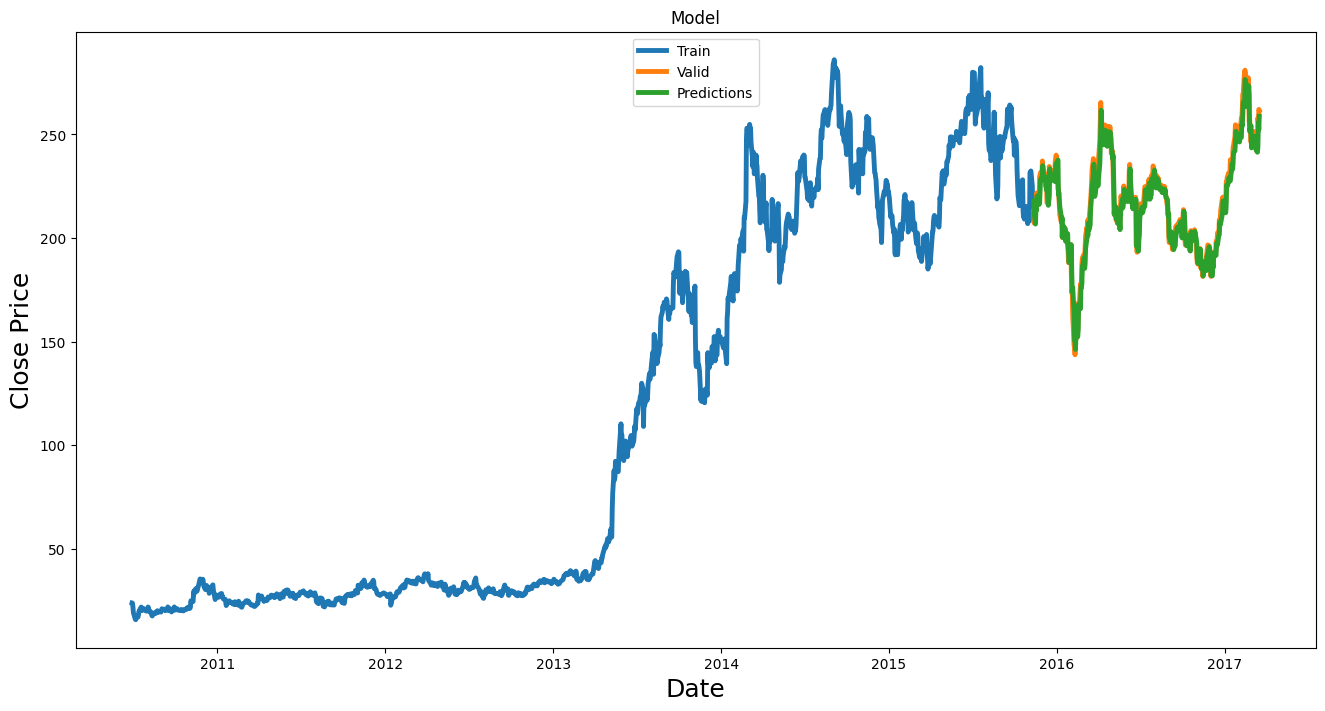

In [34]:
import warnings
warnings.filterwarnings('ignore')


train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'], loc='upper center')
plt.show()

In [35]:
valid

,Close,Predictions
Date,,
2015-11-12,212.940002,217.849594
2015-11-13,207.190002,212.009705
2015-11-16,214.309998,206.727417
2015-11-17,214.000000,213.931778
2015-11-18,221.070007,213.344910
...,...,...
2017-03-13,246.169998,241.380524
2017-03-14,258.000000,243.980698
2017-03-15,255.729996,255.747467
